In [1]:
#### importing original data ####
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns 
import re 
%matplotlib inline
import glob
from tqdm import tqdm


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import bisect
from pyopls import OPLS
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import mean_squared_error
import seaborn as sns

def count_values_greater_than(sorted_list, target_value):
    # Use bisect_right to find the index of the first element greater than the target_value
    index = bisect.bisect_left(sorted_list, target_value)
    
    # The count of values greater than the target_value is the length of the list minus the index
    count = len(sorted_list) - index
    
    return count

def round_to_sign(value):
    if value >= 0:
        return np.ceil(value)
    else:
        return np.floor(value)


In [3]:
df = pd.read_csv('/scratch/gh8sj/brown_nsclc/data/neighbor_data/tumor_stroma/tumor_stroma_merged_neighbor_data.csv')

In [4]:
df.shape

(5307540, 135)

## QQplots to check for normality

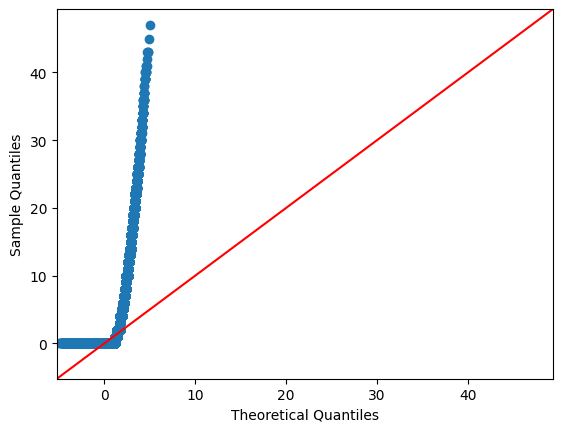

In [4]:
import numpy as np
import statsmodels.api as sm
import pylab
import numpy as np
from scipy import stats


sm.qqplot(df['CD56+CD3-IFNy- Neighbors_30um'], line='45')
pylab.show()

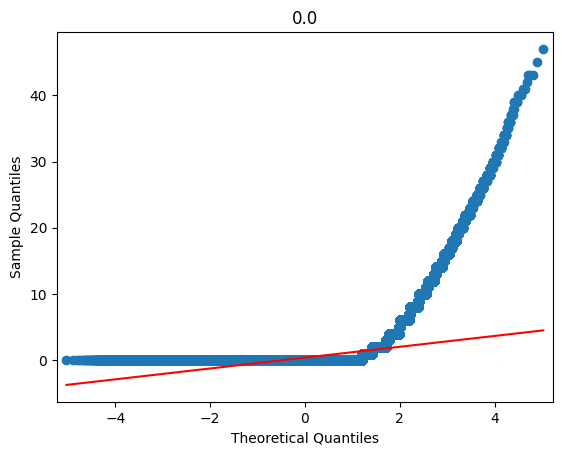

In [38]:
ks = stats.kstest(df['CD56+CD3-IFNy- Neighbors_30um'], stats.norm.cdf)
sm.qqplot(df['CD56+CD3-IFNy- Neighbors_30um'], line='r')
plt.title( f'{ks.pvalue}')
pylab.show()

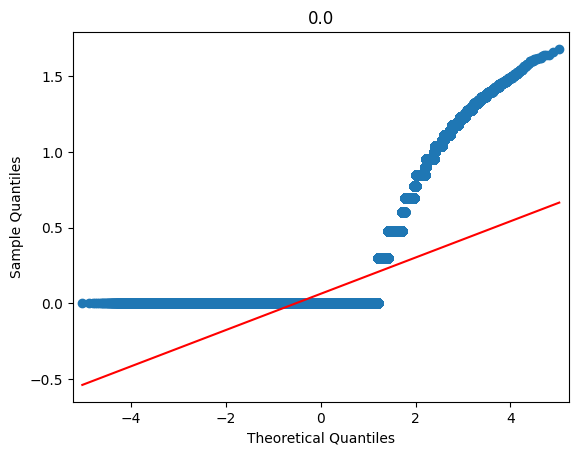

In [5]:
log_scaled_x = np.log10(df['CD56+CD3-IFNy- Neighbors_30um'] + 1)

ks = stats.kstest(log_scaled_x, stats.norm.cdf)
sm.qqplot(log_scaled_x, line='r')
plt.title( f'{ks.pvalue}')
pylab.show()

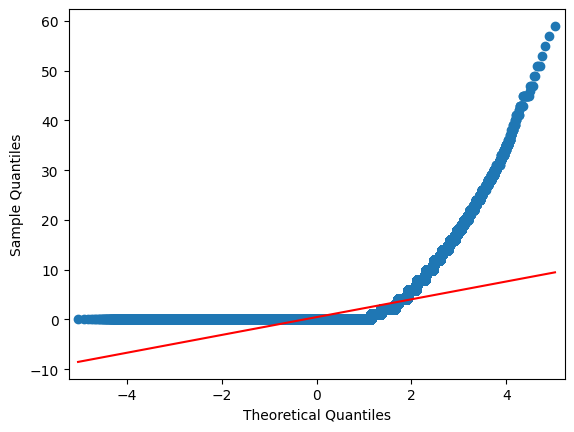

In [6]:



sm.qqplot(df['CD56+PanCyto- Neighbors_30um'], line='s')
pylab.show()

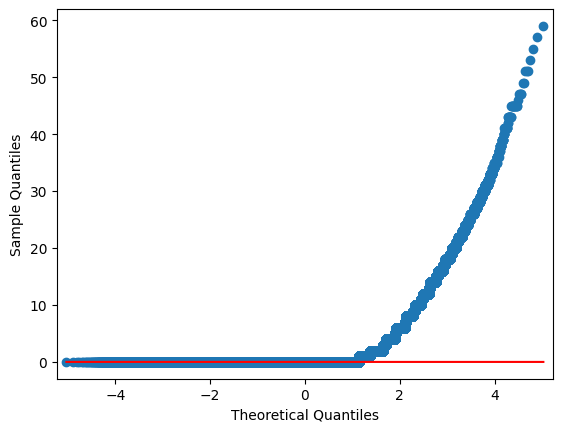

In [7]:



sm.qqplot(df['CD56+PanCyto- Neighbors_30um'], line='q')
pylab.show()

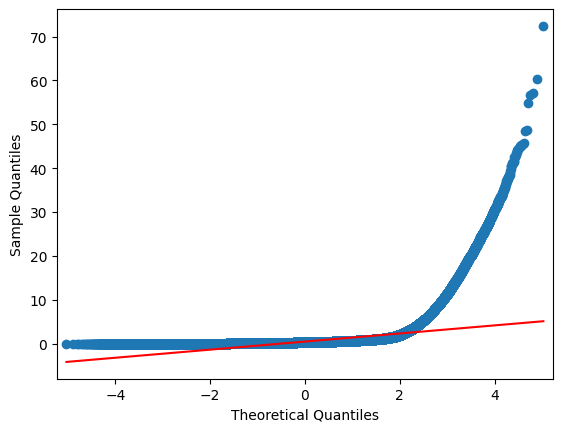

In [8]:



sm.qqplot(df['IFNy (Opal 620) Cytoplasm Intensity'], line='s')
pylab.show()

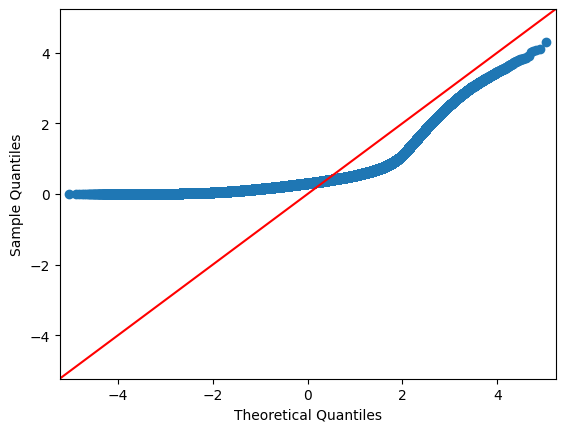

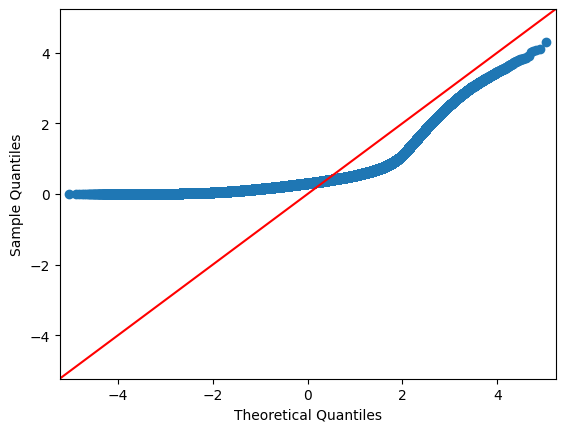

In [9]:
log_scaled_y = np.log(df['IFNy (Opal 620) Cytoplasm Intensity'] + 1)
sm.qqplot(log_scaled_y, line='45')


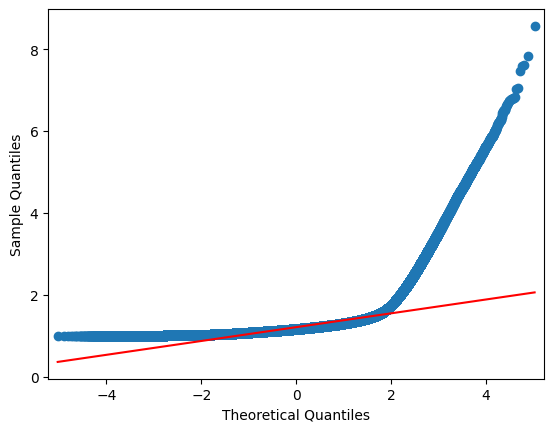

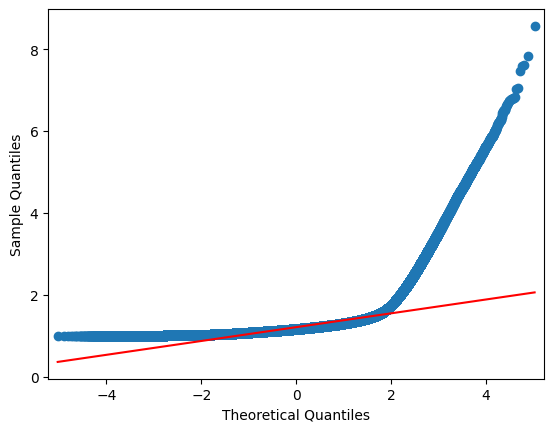

In [10]:
log_scaled_y = np.sqrt(df['IFNy (Opal 620) Cytoplasm Intensity'] + 1)
sm.qqplot(log_scaled_y, line='r')


In [5]:
immune_cells = ['CD3+CD8+IFNy+',
       'CD3+CD8+IFNy-', 'CD3+CD8-IFNy+', 'CD3+CD8-IFNy-', 'CD56+CD3-IFNy+',
       'CD56+CD3-IFNy-']

In [6]:
list(df.columns)

['Unnamed: 0',
 'Slide Index',
 'ImageLocation',
 'XMin',
 'XMax',
 'YMin',
 'YMax',
 'MHCI',
 'CD56',
 'CD8',
 'CD3',
 'IFNy',
 'IFNy (Opal 620) Cytoplasm Intensity',
 'PanCyto',
 'ClassifierLabel',
 'ROI',
 'PatientID',
 'XCenter',
 'YCenter',
 'CellArea',
 'Cytoplasm Area (µm²)',
 'Membrane Area (µm²)',
 'Nucleus Area (µm²)',
 'Nucleus Perimeter (µm)',
 'Nucleus Roundness',
 'CD56+PanCyto-',
 'CD56+CD3-',
 'PanCyto+CD3-',
 'PanCyto+MHCI+',
 'PanCyto+MHCI-',
 'PanCyto-CD56-',
 'CD3+CD8-',
 'CD3+CD8+',
 'CD3+CD8+IFNy+',
 'CD3+CD8+IFNy-',
 'CD3+CD8-IFNy+',
 'CD3+CD8-IFNy-',
 'CD56+CD3-IFNy+',
 'CD56+CD3-IFNy-',
 'CD3+CD8+IFNy+ Tumor_30um',
 'CD3+CD8+IFNy+ Stroma_30um',
 'CD3+CD8+IFNy+ Glass_30um',
 'CD3+CD8+IFNy- Tumor_30um',
 'CD3+CD8+IFNy- Stroma_30um',
 'CD3+CD8+IFNy- Glass_30um',
 'CD3+CD8-IFNy+ Tumor_30um',
 'CD3+CD8-IFNy+ Stroma_30um',
 'CD3+CD8-IFNy+ Glass_30um',
 'CD3+CD8-IFNy- Tumor_30um',
 'CD3+CD8-IFNy- Stroma_30um',
 'CD3+CD8-IFNy- Glass_30um',
 'CD56+CD3-IFNy+ Tumor_30um',

## first ill try removing glass and see how that does

In [7]:
df = df.loc[df['ClassifierLabel'] != 'glass']

In [8]:
df['Total CD3+CD8+ Tumor Neighbors_30um'] = df['CD3+CD8+IFNy+ Tumor Neighbors_30um'] + df['CD3+CD8+IFNy- Tumor Neighbors_30um']
df['Total CD3+CD8- Tumor Neighbors_30um'] = df['CD3+CD8-IFNy+ Tumor Neighbors_30um'] + df['CD3+CD8-IFNy- Tumor Neighbors_30um']
df['Total CD56+CD3- Tumor Neighbors_30um'] = df['CD56+CD3-IFNy+ Tumor Neighbors_30um'] + df['CD56+CD3-IFNy- Tumor Neighbors_30um']
df['Total PanCyto Tumor Neighbors_30um'] = df['PanCyto+MHCI+ Tumor Neighbors_30um'] + df['PanCyto+MHCI- Tumor Neighbors_30um']

df['Total CD3+CD8+ Stroma Neighbors_30um'] = df['CD3+CD8+IFNy+ Stroma Neighbors_30um'] + df['CD3+CD8+IFNy- Stroma Neighbors_30um']
df['Total CD3+CD8- Stroma Neighbors_30um'] = df['CD3+CD8-IFNy+ Stroma Neighbors_30um'] + df['CD3+CD8-IFNy- Stroma Neighbors_30um']
df['Total CD56+CD3- Stroma Neighbors_30um'] = df['CD56+CD3-IFNy+ Stroma Neighbors_30um'] + df['CD56+CD3-IFNy- Stroma Neighbors_30um']
df['Total PanCyto Stroma Neighbors_30um'] = df['PanCyto+MHCI+ Stroma Neighbors_30um'] + df['PanCyto+MHCI- Stroma Neighbors_30um']

df['Total CD3+CD8+ Tumor Neighbors_200um'] = df['CD3+CD8+IFNy+ Tumor Neighbors_30um'] + df['CD3+CD8+IFNy- Tumor Neighbors_30um']
df['Total CD3+CD8- Tumor Neighbors_200um'] = df['CD3+CD8-IFNy+ Tumor Neighbors_30um'] + df['CD3+CD8-IFNy- Tumor Neighbors_30um']
df['Total CD56+CD3- Tumor Neighbors_200um'] = df['CD56+CD3-IFNy+ Tumor Neighbors_30um'] + df['CD56+CD3-IFNy- Tumor Neighbors_30um']
df['Total PanCyto Tumor Neighbors_200um'] = df['PanCyto+MHCI+ Tumor Neighbors_200um'] + df['PanCyto+MHCI- Tumor Neighbors_200um']

df['Total CD3+CD8+ Stroma Neighbors_200um'] = df['CD3+CD8+IFNy+ Stroma Neighbors_200um'] + df['CD3+CD8+IFNy- Stroma Neighbors_200um']
df['Total CD3+CD8- Stroma Neighbors_200um'] = df['CD3+CD8-IFNy+ Stroma Neighbors_200um'] + df['CD3+CD8-IFNy- Stroma Neighbors_200um']
df['Total CD56+CD3- Stroma Neighbors_200um'] = df['CD56+CD3-IFNy+ Stroma Neighbors_200um'] + df['CD56+CD3-IFNy- Stroma Neighbors_200um']
df['Total PanCyto Stroma Neighbors_200um'] = df['PanCyto+MHCI+ Stroma Neighbors_200um'] + df['PanCyto+MHCI- Stroma Neighbors_200um']


In [9]:
immune_cells = ['CD3+CD8+IFNy+',
       'CD3+CD8+IFNy-', 'CD3+CD8-IFNy+', 'CD3+CD8-IFNy-', 'CD56+CD3-IFNy+',
       'CD56+CD3-IFNy-']
    
neighbors = ['CD3+CD8+IFNy+ Tumor Neighbors_30um','CD3+CD8+IFNy+ Stroma Neighbors_30um','CD3+CD8+IFNy- Tumor Neighbors_30um','CD3+CD8+IFNy- Stroma Neighbors_30um',
             'CD3+CD8-IFNy+ Tumor Neighbors_30um','CD3+CD8-IFNy+ Stroma Neighbors_30um','CD3+CD8-IFNy- Tumor Neighbors_30um','CD3+CD8-IFNy- Stroma Neighbors_30um',
             'CD56+CD3-IFNy+ Tumor Neighbors_30um','CD56+CD3-IFNy+ Stroma Neighbors_30um','CD56+CD3-IFNy- Tumor Neighbors_30um','CD56+CD3-IFNy- Stroma Neighbors_30um',
             'PanCyto+MHCI+ Tumor Neighbors_30um','PanCyto+MHCI+ Stroma Neighbors_30um','PanCyto+MHCI- Tumor Neighbors_30um','PanCyto+MHCI- Stroma Neighbors_30um',  
             'CD3+CD8+IFNy+ Tumor Neighbors_200um','CD3+CD8+IFNy+ Stroma Neighbors_200um','CD3+CD8+IFNy- Tumor Neighbors_200um','CD3+CD8+IFNy- Stroma Neighbors_200um',
             'CD3+CD8-IFNy+ Tumor Neighbors_200um','CD3+CD8-IFNy+ Stroma Neighbors_200um','CD3+CD8-IFNy- Tumor Neighbors_200um','CD3+CD8-IFNy- Stroma Neighbors_200um',
             'CD56+CD3-IFNy+ Tumor Neighbors_200um','CD56+CD3-IFNy+ Stroma Neighbors_200um','CD56+CD3-IFNy- Tumor Neighbors_200um','CD56+CD3-IFNy- Stroma Neighbors_200um',
             'PanCyto+MHCI+ Tumor Neighbors_200um','PanCyto+MHCI+ Stroma Neighbors_200um','PanCyto+MHCI- Tumor Neighbors_200um','PanCyto+MHCI- Stroma Neighbors_200um','Total CD3+CD8+ Tumor Neighbors_30um',
             'Total CD3+CD8- Tumor Neighbors_30um','Total CD56+CD3- Tumor Neighbors_30um','Total CD3+CD8+ Stroma Neighbors_30um','Total CD3+CD8- Stroma Neighbors_30um','Total CD56+CD3- Stroma Neighbors_30um',
             'Total CD3+CD8+ Tumor Neighbors_200um','Total CD3+CD8- Tumor Neighbors_200um','Total CD56+CD3- Tumor Neighbors_200um','Total CD3+CD8+ Stroma Neighbors_200um','Total CD3+CD8- Stroma Neighbors_200um',
             'Total CD56+CD3- Stroma Neighbors_200um','Total PanCyto Tumor Neighbors_30um','Total PanCyto Stroma Neighbors_30um','Total PanCyto Tumor Neighbors_200um','Total PanCyto Stroma Neighbors_200um']

In [10]:
df_immune = df[df[immune_cells].any(axis=1)]

In [11]:
df_immune

,Unnamed: 0,Slide Index,ImageLocation,XMin,XMax,YMin,YMax,MHCI,CD56,CD8,...,Total CD56+CD3- Stroma Neighbors_30um,Total PanCyto Stroma Neighbors_30um,Total CD3+CD8+ Tumor Neighbors_200um,Total CD3+CD8- Tumor Neighbors_200um,Total CD56+CD3- Tumor Neighbors_200um,Total PanCyto Tumor Neighbors_200um,Total CD3+CD8+ Stroma Neighbors_200um,Total CD3+CD8- Stroma Neighbors_200um,Total CD56+CD3- Stroma Neighbors_200um,Total PanCyto Stroma Neighbors_200um
176,176,176,E:\BROWN RESCAN 11.8.19\Rescan Images 11.11.19...,1996.04416,2003.46256,13.35312,19.78240,0.0,0.0,1.0,...,0.0,0.0,3.0,2.0,0.0,104.0,0.0,4.0,0.0,0.0
179,179,179,E:\BROWN RESCAN 11.8.19\Rescan Images 11.11.19...,1989.61488,1999.50608,27.20080,34.12464,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,0.0,118.0,0.0,4.0,0.0,0.0
182,182,182,E:\BROWN RESCAN 11.8.19\Rescan Images 11.11.19...,1990.60400,2000.49520,41.54304,48.46688,0.0,0.0,1.0,...,0.0,0.0,3.0,2.0,0.0,142.0,0.0,4.0,0.0,0.0
188,188,188,E:\BROWN RESCAN 11.8.19\Rescan Images 11.11.19...,2002.47344,2008.40816,163.20480,169.63408,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,254.0,0.0,6.0,0.0,0.0
192,192,192,E:\BROWN RESCAN 11.8.19\Rescan Images 11.11.19...,1995.05504,2001.48432,188.42736,194.36208,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,278.0,0.0,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307503,5307503,8457,E:\Brown 4.25.19\Unmixed Images 4.29.19\MAD17-...,-0.98912,6.92384,525.22272,530.16832,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,260.0,1.0,5.0,0.0,14.0
5307505,5307505,8459,E:\Brown 4.25.19\Unmixed Images 4.29.19\MAD17-...,13.84768,20.27696,534.61936,542.53232,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,290.0,0.0,6.0,0.0,15.0
5307515,5307515,8469,E:\Brown 4.25.19\Unmixed Images 4.29.19\MAD17-...,363.99616,371.41456,565.77664,572.70048,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,256.0,0.0,1.0,0.0,6.0
5307518,5307518,8472,E:\Brown 4.25.19\Unmixed Images 4.29.19\MAD17-...,364.49072,372.89824,575.17328,583.08624,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,249.0,0.0,1.0,0.0,6.0


In [12]:
df_immune_cells = df_immune.loc[:,df_immune.columns.isin(immune_cells)]
df_immune_cells 

,CD3+CD8+IFNy+,CD3+CD8+IFNy-,CD3+CD8-IFNy+,CD3+CD8-IFNy-,CD56+CD3-IFNy+,CD56+CD3-IFNy-
176,0.0,1.0,0.0,0.0,0.0,0.0
179,0.0,0.0,0.0,1.0,0.0,0.0
182,0.0,1.0,0.0,0.0,0.0,0.0
188,0.0,0.0,0.0,1.0,0.0,0.0
192,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
5307503,0.0,0.0,0.0,1.0,0.0,0.0
5307505,0.0,1.0,0.0,0.0,0.0,0.0
5307515,0.0,0.0,0.0,1.0,0.0,0.0
5307518,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
total_counts = df_immune_cells.iloc[:, :].sum()  # Exclude the 'Category' column from the sum

percentages = (df_immune_cells == 1).sum() / len(df_immune_cells) * 100
percentages

CD3+CD8+IFNy+      0.809523
CD3+CD8+IFNy-     27.608250
CD3+CD8-IFNy+      0.410968
CD3+CD8-IFNy-     62.230884
CD56+CD3-IFNy+     0.164738
CD56+CD3-IFNy-     8.775637
dtype: float64

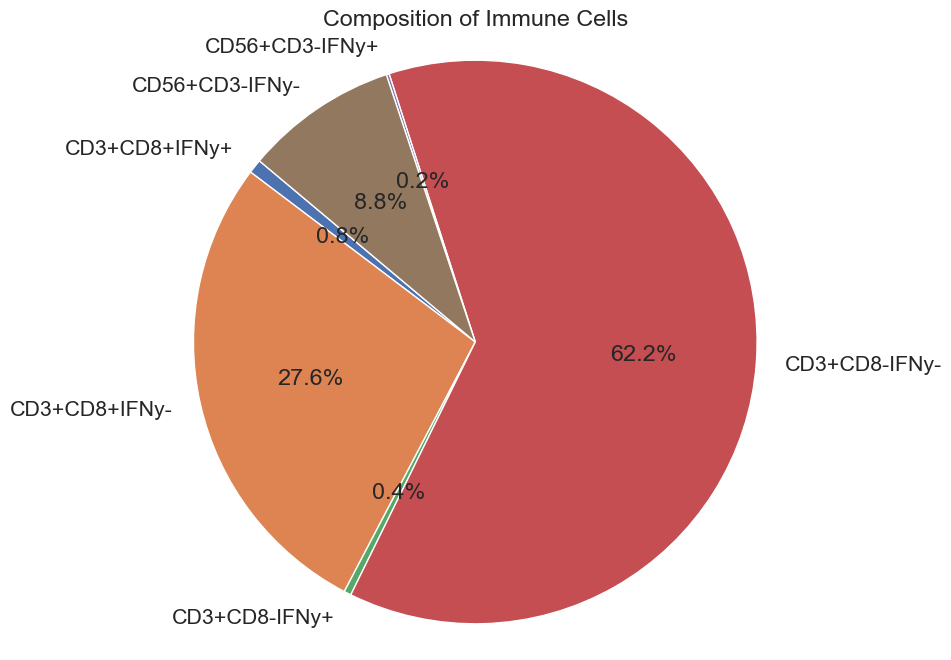

In [14]:
sns.set(font_scale = 1.4)
sns.set_style("ticks")

plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Composition of Immune Cells')
#plt.savefig('/home/gh8sj/projects/gabe_kate_method/figures/nsclc/final_figures/fig1B.pie_chart.pdf',format='pdf')
plt.savefig('/scratch/gh8sj/kate_gabe_paper_figures/figure2/fig2b.pdf', format = 'pdf', bbox_inches = 'tight')

# Show the plot
plt.show()

<Figure size 500x400 with 0 Axes>

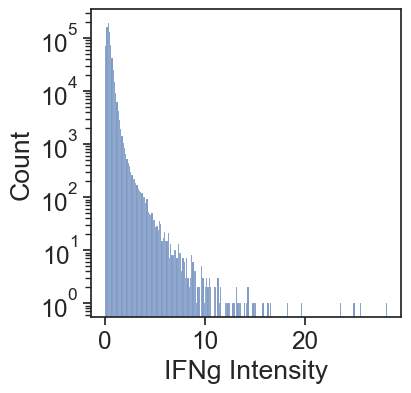

In [15]:
sns.set(font_scale = 1.6)
sns.set_style("ticks")
plt.figure(figsize=(5, 4)) 


plt.figure(figsize=(4, 4)) 
sns.histplot(df_immune['IFNy (Opal 620) Cytoplasm Intensity'],binwidth=0.125, )
plt.xlabel('IFNg Intensity')
plt.yscale('log')
plt.savefig('/scratch/gh8sj/kate_gabe_paper_figures/figure2/fig2c.pdf', format = 'pdf', bbox_inches = 'tight')

#plt.xscale('log')

<Figure size 500x400 with 0 Axes>

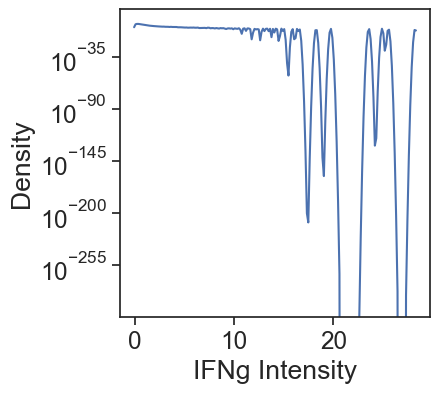

In [16]:
sns.set(font_scale = 1.6)
sns.set_style("ticks")
plt.figure(figsize=(5, 4)) 


plt.figure(figsize=(4, 4)) 
sns.kdeplot(df_immune['IFNy (Opal 620) Cytoplasm Intensity'])
plt.xlabel('IFNg Intensity')
plt.yscale('log')

In [17]:
# Venn diagram of immune cells

In [18]:

X_unscaled = df_immune[ neighbors]
y = df_immune['IFNy (Opal 620) Cytoplasm Intensity']
y = np.log1p(y)
y;

## correlation matrix for features

<Axes: >

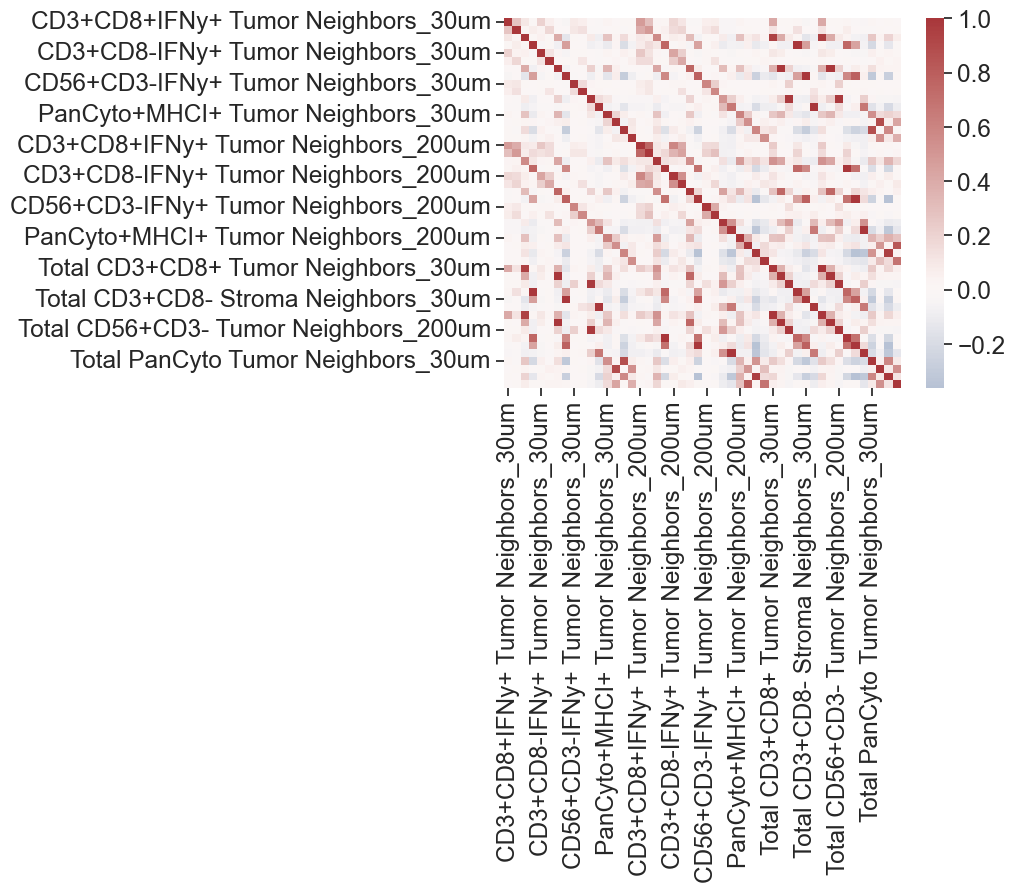

In [24]:
corr = X_unscaled.corr()
sns.heatmap(corr, cmap = 'vlag', center = 0, )

In [19]:
X = np.log1p(X_unscaled) 

for export into matlab
X['IFNg_intensity'] = y
export_df = X
export_df.to_csv('/scratch/gh8sj/brown_nsclc/data/neighbor_data/tumor_stroma/tumor_stroma_merged_log1p.csv')

In [20]:
X

,CD3+CD8+IFNy+ Tumor Neighbors_30um,CD3+CD8+IFNy+ Stroma Neighbors_30um,CD3+CD8+IFNy- Tumor Neighbors_30um,CD3+CD8+IFNy- Stroma Neighbors_30um,CD3+CD8-IFNy+ Tumor Neighbors_30um,CD3+CD8-IFNy+ Stroma Neighbors_30um,CD3+CD8-IFNy- Tumor Neighbors_30um,CD3+CD8-IFNy- Stroma Neighbors_30um,CD56+CD3-IFNy+ Tumor Neighbors_30um,CD56+CD3-IFNy+ Stroma Neighbors_30um,...,Total CD3+CD8+ Tumor Neighbors_200um,Total CD3+CD8- Tumor Neighbors_200um,Total CD56+CD3- Tumor Neighbors_200um,Total CD3+CD8+ Stroma Neighbors_200um,Total CD3+CD8- Stroma Neighbors_200um,Total CD56+CD3- Stroma Neighbors_200um,Total PanCyto Tumor Neighbors_30um,Total PanCyto Stroma Neighbors_30um,Total PanCyto Tumor Neighbors_200um,Total PanCyto Stroma Neighbors_200um
176,0.0,0.0,1.386294,0.000000,0.0,0.0,1.098612,0.000000,0.0,0.0,...,1.386294,1.098612,0.0,0.000000,1.609438,0.0,1.609438,0.000000,4.653960,0.000000
179,0.0,0.0,1.609438,0.000000,0.0,0.0,0.693147,0.000000,0.0,0.0,...,1.609438,0.693147,0.0,0.000000,1.609438,0.0,2.397895,0.000000,4.779123,0.000000
182,0.0,0.0,1.386294,0.000000,0.0,0.0,1.098612,0.000000,0.0,0.0,...,1.386294,1.098612,0.0,0.000000,1.609438,0.0,2.197225,0.000000,4.962845,0.000000
188,0.0,0.0,0.000000,0.000000,0.0,0.0,1.386294,1.098612,0.0,0.0,...,0.000000,1.386294,0.0,0.000000,1.945910,0.0,2.197225,0.000000,5.541264,0.000000
192,0.0,0.0,0.000000,0.000000,0.0,0.0,1.791759,1.098612,0.0,0.0,...,0.000000,1.791759,0.0,0.000000,2.197225,0.0,2.708050,0.000000,5.631212,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307503,0.0,0.0,0.000000,0.693147,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.693147,1.791759,0.0,0.000000,0.000000,5.564520,2.708050
5307505,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.693147,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,1.945910,0.0,1.098612,0.000000,5.673323,2.772589
5307515,0.0,0.0,0.000000,0.000000,0.0,0.0,0.693147,0.693147,0.0,0.0,...,0.000000,0.693147,0.0,0.000000,0.693147,0.0,0.693147,0.000000,5.549076,1.945910
5307518,0.0,0.0,0.000000,0.000000,0.0,0.0,0.693147,0.693147,0.0,0.0,...,0.000000,0.693147,0.0,0.000000,0.693147,0.0,0.693147,0.000000,5.521461,1.945910


In [21]:
import matplotlib.pyplot as plt

# Sample data

sizes = [15, 30, 45, 10]  # Sizes or proportions of each slice

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Pie Chart Example')

# Show the plot
plt.show()

NameError: name 'labels' is not defined

<Figure size 800x800 with 0 Axes>

In [22]:
%%time 
# do you orthogoranlize all the permutations? -> yes



# Generate some example data
np.random.seed(42)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
opls = OPLS(2) # 1 components
Z = opls.fit_transform(X, y)
pls_model = PLSRegression(2)


pls_model.fit(Z, y)
#y_pred= pls.predict(X)
processed_y_pred = cross_val_predict(pls_model, Z, y, cv=5)

                           
processed_q_squared = r2_score(y, processed_y_pred) 
processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
processed_mse = mean_squared_error(y, processed_y_pred)
#processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
#processed_accuracy_rounded = round(processed_accuracy,2)

variance_in_x = np.var(pls_model.x_scores_, axis = 0) 
total_variance_in_x = np.var(Z, axis = 0)
# normalize variance by total variance:
#fractions_of_explained_variance = variance_in_x / total_variance_in_x

r2_X = opls.score(X)  # 7.8e-12 (most variance is removed)


# Number of permutations
num_permutations = 100

# List to store permutation accuracies
permuted_mse_list = []
permuted_q2_list = []

# Permutation testing loop
for _ in tqdm(range(num_permutations)):
    # Randomly permute the labels
    permuted_labels = np.random.permutation(y)
    
    
#processed_y_pred = cross_val_predict(pls, Z, y, cv=1000)
#processed_q_squared = r2_score(y, processed_y_pred)  # 0.981
#processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
#processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
    opls = OPLS(2) # 1 components
    Z_i = opls.fit_transform(X, permuted_labels)

    #permuted_model.fit(X, permuted_labels)
    pls = PLSRegression(2)
    permuted_pred = cross_val_predict(pls, Z_i, permuted_labels, cv=5) # I should change this to something smaller, leave one out would literally take foever
    # Make predictions with the permuted model
    #permuted_predictions = permuted_model.predict(X)
    
    # Calculate accuracy and store in the list
    #permuted_pred = [round_to_sign(value) for value in permuted_pred]# Round each value in the list based on the specified rules

    permuted_mse = mean_squared_error(y, permuted_pred)
    permuted_q_squared = r2_score(y, permuted_pred) 
    #permuted_accuracy = accuracy_score(y, permuted_pred)
    permuted_mse_list.append(permuted_mse)
    permuted_q2_list.append(permuted_q_squared)
    


100%|██████████| 100/100 [05:01<00:00,  3.02s/it]

CPU times: user 8min 42s, sys: 12min 26s, total: 21min 8s
Wall time: 5min 5s


In [23]:
permuted_mse_list.sort()


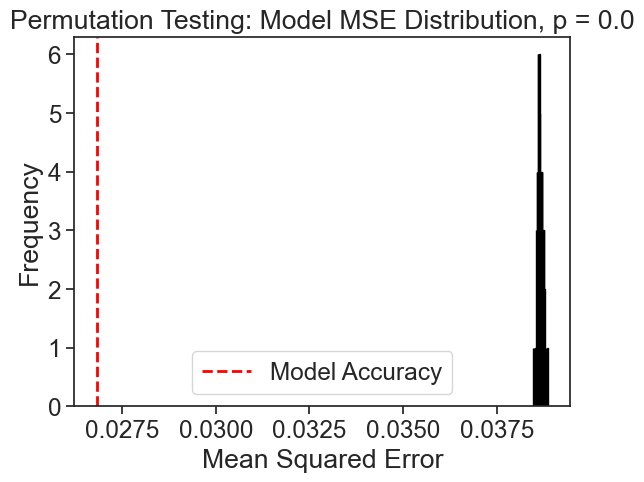

In [24]:
#permuted_accuracies = pd.Series(np.sort(permuted_accuracies), index = range(1000))
permuted_mse_list.sort()

result_count = count_values_greater_than(permuted_mse_list, processed_mse)
p = (100-result_count)/100
p_round = round(p,3)

# Plotting the histogram
plt.hist(permuted_mse_list, bins=50, edgecolor='black')
plt.axvline(x=processed_mse, color='red', linestyle='dashed', linewidth=2, label='Model Accuracy')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title(f'Permutation Testing: Model MSE Distribution, p = {p}')
plt.legend()
plt.show()

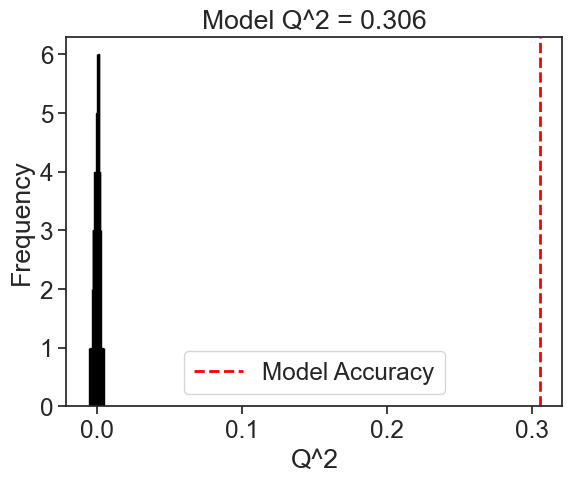

In [25]:
# Plotting the histogram
plt.hist(permuted_q2_list, bins=50, edgecolor='black')
plt.axvline(x=processed_q_squared, color='red', linestyle='dashed', linewidth=2, label='Model Accuracy')
plt.xlabel('Q^2')
plt.ylabel('Frequency')
plt.title(f'Model Q^2 = {np.round(processed_q_squared,3)}')
plt.legend()
plt.show()

In [26]:
#plt.figure(1)
#df = pd.DataFrame(np.column_stack([pls_model.x_scores_, opls.T_ortho_[:, 0]]),
#                  index=y.index, columns=['t', 't_ortho'])                
df = pd.DataFrame(np.column_stack([pls_model.x_scores_]),
                  index=y.index, columns=['lv1', 'lv2'])       
df['true label'] = y

In [27]:
sampled_df = df.sample(10000)

# from matlab
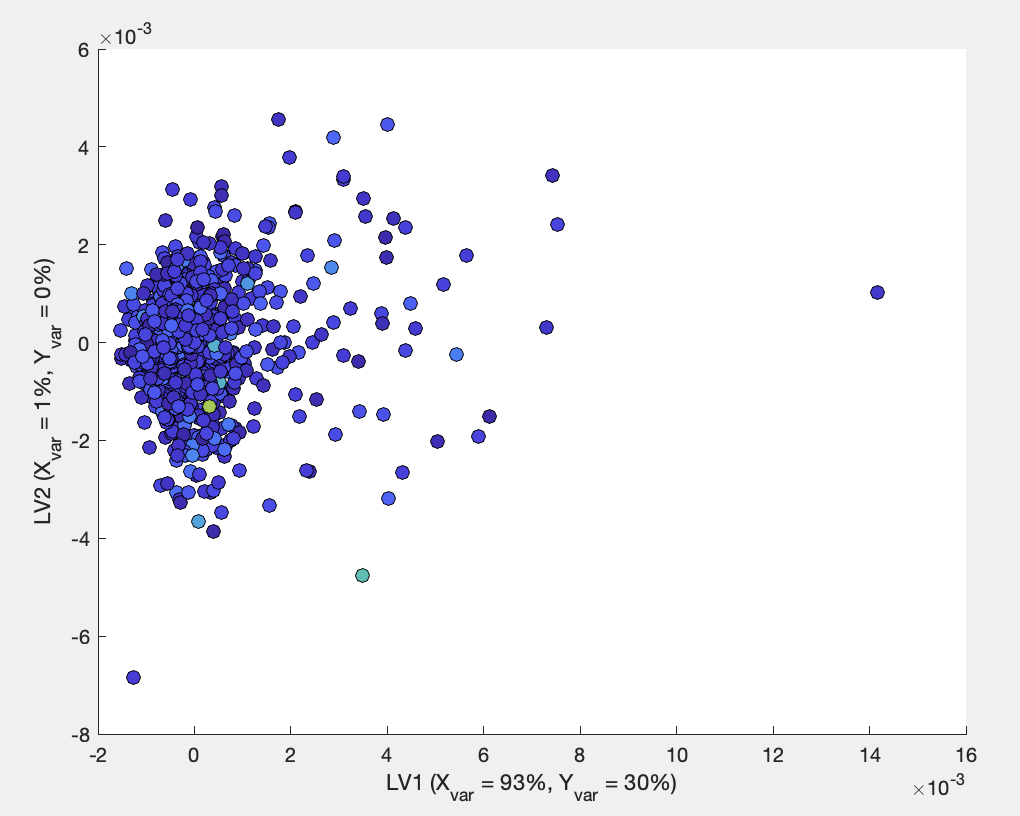

In [28]:
y.describe()

count    741177.000000
mean          0.323448
std           0.196558
min           0.000000
25%           0.196966
50%           0.290673
75%           0.407055
max           3.375688
Name: IFNy (Opal 620) Cytoplasm Intensity, dtype: float64

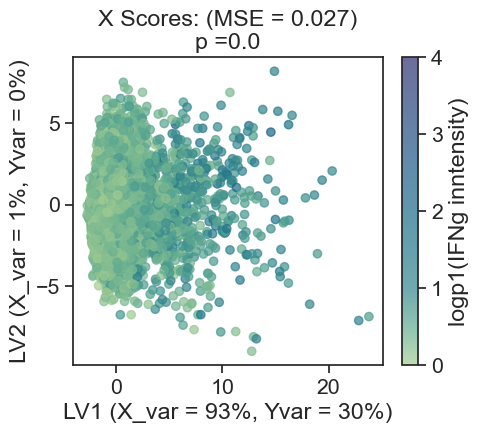

In [29]:
import matplotlib.colors as colors
sns.set(font_scale = 1.4)
sns.set_style("ticks")
plt.figure(figsize=(5, 4)) 

divnorm = colors.TwoSlopeNorm(vmin=0, vcenter=1, vmax=4)

plt.scatter(sampled_df['lv1'], sampled_df['lv2'], c = sampled_df['true label'], cmap = 'crest', alpha = 0.7, norm=divnorm)
plt.title(f'X Scores: (MSE = {np.round(processed_mse,3)})\np ={p_round}')
plt.xlabel('LV1 (X_var = 93%, Yvar = 30%)')
plt.ylabel('LV2 (X_var = 1%, Yvar = 0%)')
#plt.legend(loc='upper right')
cb = plt.colorbar(label="logp1(IFNg inntensity)", orientation="vertical") 
cb.set_ticks([0,1,2,3,4])
cb.ax.set_yscale('linear')
plt.savefig('/scratch/gh8sj/kate_gabe_paper_figures/figure2/fig2d.pdf', format = 'pdf', bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


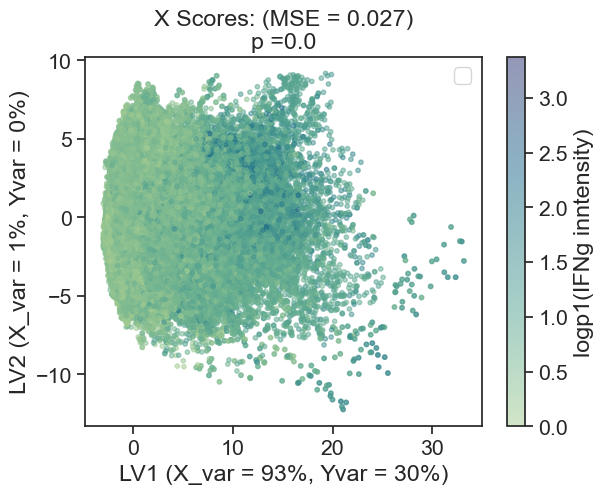

In [30]:

plt.scatter(df['lv1'], df['lv2'], c = df['true label'], cmap = 'crest', alpha = 0.5, s =10)
plt.title(f'X Scores: (MSE = {np.round(processed_mse,3)})\np ={p_round}')
plt.xlabel('LV1 (X_var = 93%, Yvar = 30%)')
plt.ylabel('LV2 (X_var = 1%, Yvar = 0%)')
plt.colorbar(label="logp1(IFNg inntensity)", orientation="vertical") 

plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Loadings for oPLSDA model')

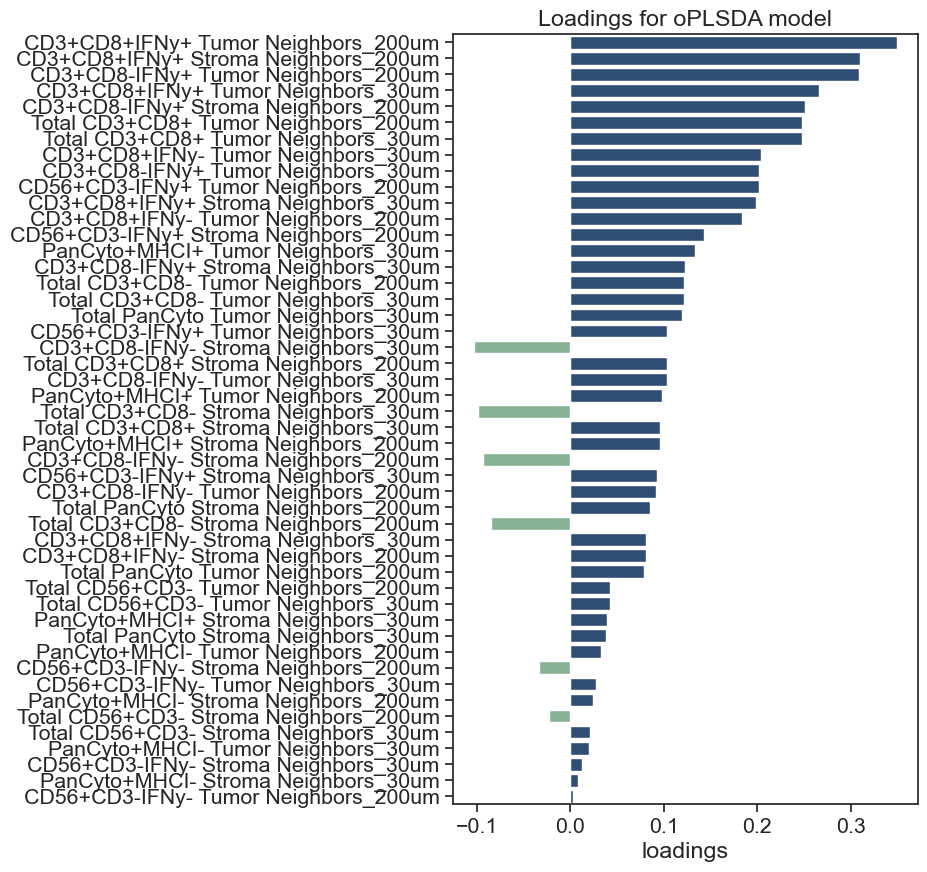

In [31]:
plt.figure(figsize=(6, 10)) 
x_loadings = pd.DataFrame(pls_model.x_loadings_[:,0].flatten(), index= X.columns, columns = ['loadings'])
x_loadings['color'] = np.where(x_loadings['loadings'] > 0, 'high', 'low')
colors = {'high': (0.14573579, 0.29354139, 0.49847009), 'low': (0.48942421, 0.72854938, 0.56751036)}

x_loadings['abs_val'] = abs(x_loadings['loadings'])
x_loadings = x_loadings.sort_values(by = 'abs_val', ascending=False)
sns.barplot(data = x_loadings, x=x_loadings['loadings'],y = x_loadings.index, hue = 'color', palette = colors)
plt.legend().set_visible(False)
plt.ylabel('')
plt.title('Loadings for oPLSDA model')

In [32]:
for i in loadings_vips.index:
    print(loadings_vips.loc[i,'loadings'])

NameError: name 'loadings_vips' is not defined

In [ ]:

# lets try to make a VIP score with the same logic as Rem's code:
# Calculate VIP scores
def vip_efficient(model):
    t = model.x_scores_
    w = model.x_weights_ # replace with x_rotations_ if needed
    q = model.y_loadings_ 
    features_, _ = w.shape
    vip = np.zeros(shape=(features_,))
    inner_sum = np.diag(t.T @ t @ q.T @ q)
    SS_total = np.sum(inner_sum)
    vip = np.sqrt(features_*(w**2 @ inner_sum)/ SS_total)
    return vip

vips = vip_efficient(pls_model)
sns.set(font_scale = 1.2)
sns.set_style("ticks")
plt.figure(figsize=(4, 10)) 


loadings_vips = pd.DataFrame(pls_model.x_loadings_[:,0].flatten(), index= X.columns, columns = ['loadings'])
loadings_vips['VIPs'] = vips
loadings_vips['color'] = np.where(loadings_vips['loadings'] > 0, 'high', 'low')
colors = {'high': (0.14573579, 0.29354139, 0.49847009), 'low': (0.48942421, 0.72854938, 0.56751036)}

loadings_vips = loadings_vips.sort_values(by = 'VIPs', ascending=False)
for i in loadings_vips.index:
    if loadings_vips.loc[i,'loadings'] < 0:
        loadings_vips.loc[i,'VIPs'] = loadings_vips.loc[i,'VIPs']*-1
sns.barplot(data = loadings_vips, x=loadings_vips['VIPs'],y = loadings_vips.index, hue = 'color', palette = colors)
plt.axvline(x = -1, color = 'r', linestyle='--')
plt.axvline(x = 1, color = 'r', linestyle='--')
plt.legend().set_visible(False)
plt.ylabel('')
plt.title('VIPs for oPLSDA model')
plt.savefig('/scratch/gh8sj/kate_gabe_paper_figures/figure2/fig2e_long.pdf', format = 'pdf', bbox_inches = 'tight')


In [ ]:

# lets try to make a VIP score with the same logic as Rem's code:
# Calculate VIP scores

vips = vip_efficient(pls_model)
sns.set(font_scale = 1.4)
sns.set_style("ticks")
plt.figure(figsize=(4, 6)) 

sns.barplot(data = loadings_vips[:13], x=loadings_vips['VIPs'][:13],y = loadings_vips.index[:13], hue = 'color', palette = colors)
plt.axvline(x = -1, color = 'r', linestyle='--')
plt.axvline(x = 1, color = 'r', linestyle='--')
plt.legend().set_visible(False)
plt.ylabel('')
plt.title('VIPs for oPLSDA model')
plt.savefig('/scratch/gh8sj/kate_gabe_paper_figures/figure2/fig2e.pdf', format = 'pdf', bbox_inches = 'tight')


## Univariate plotting

<Axes: xlabel='CD3+CD8+IFNy+ Tumor Neighbors_200um', ylabel='IFNy (Opal 620) Cytoplasm Intensity'>

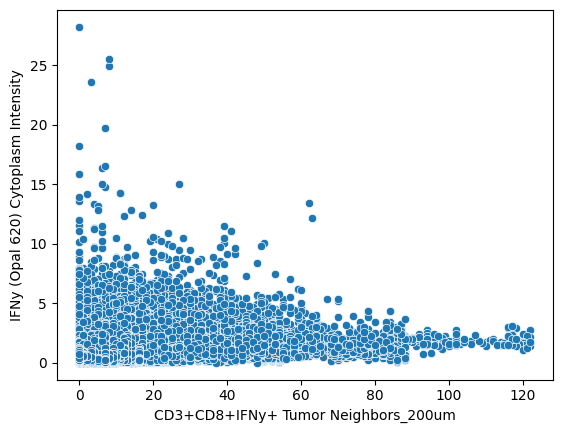

In [35]:
sns.scatterplot(x = X_unscaled['CD3+CD8+IFNy+ Tumor Neighbors_200um'], y = y)

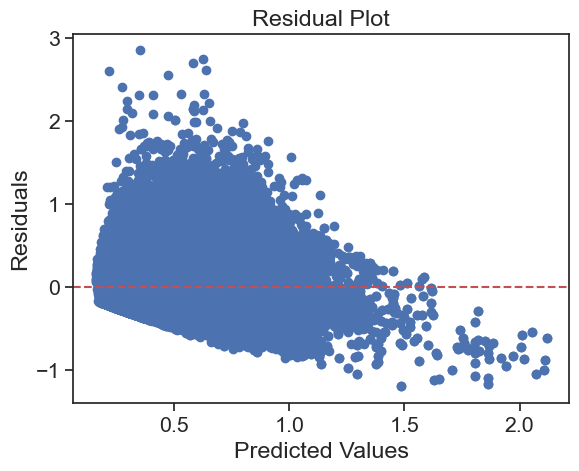

In [43]:
# ROC equivalent: residuals plot

residuals = y - processed_y_pred

plt.scatter(processed_y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

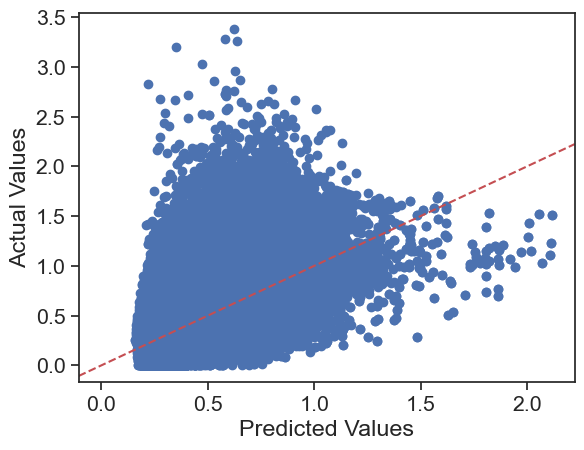

In [44]:
# ROC equivalent: residuals plot

plt.scatter(processed_y_pred, y)
plt.axline((0, 0), slope=1., linestyle='--',color='r', label='by slope')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

In [57]:
y.describe()

count    741177.000000
mean          0.413482
std           0.381992
min           0.000000
25%           0.217703
50%           0.337327
75%           0.502387
max          28.244390
Name: IFNy (Opal 620) Cytoplasm Intensity, dtype: float64

## LASSO regularized

### first just use alpha = 1 - doesn't converge , i just get no features

In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import zscore 

df = pd.read_csv('/scratch/gh8sj/brown_nsclc/data/neighbor_data/iteration2/merged_neighbor_data.csv')
# parameters to be tested on GridSearchCV

In [64]:
neighbors =  ['CD56+PanCyto- Neighbors_30um','PanCyto+CD3- Neighbors_30um',
              'PanCyto+MHCI+ Neighbors_30um', 'PanCyto+MHCI- Neighbors_30um', 
              'CD3+CD8+IFNy+ Neighbors_30um', 'CD3+CD8+IFNy- Neighbors_30um', 
              'CD3+CD8-IFNy+ Neighbors_30um', 'CD3+CD8-IFNy- Neighbors_30um', 
              'CD56+CD3-IFNy+ Neighbors_30um', 'CD56+CD3-IFNy- Neighbors_30um', 
              'CD56+PanCyto- Neighbors_200um', 'PanCyto+CD3- Neighbors_200um', 
              'PanCyto+MHCI+ Neighbors_200um', 'PanCyto+MHCI- Neighbors_200um', 
              'CD3+CD8+IFNy+ Neighbors_200um', 'CD3+CD8+IFNy- Neighbors_200um',
              'CD3+CD8-IFNy+ Neighbors_200um', 'CD3+CD8-IFNy- Neighbors_200um', 
              'CD56+CD3-IFNy+ Neighbors_200um', 'CD56+CD3-IFNy- Neighbors_200um']

X = df[ neighbors]


# Number of Folds and adding the random state for replication
z_score_x = zscore(X.astype(float), axis = 1, ddof=1)
full_z_score_x.isna().sum()

CD56+PanCyto- Neighbors_30um      0
PanCyto+CD3- Neighbors_30um       0
PanCyto+MHCI+ Neighbors_30um      0
PanCyto+MHCI- Neighbors_30um      0
CD3+CD8+IFNy+ Neighbors_30um      0
CD3+CD8+IFNy- Neighbors_30um      0
CD3+CD8-IFNy+ Neighbors_30um      0
CD3+CD8-IFNy- Neighbors_30um      0
CD56+CD3-IFNy+ Neighbors_30um     0
CD56+CD3-IFNy- Neighbors_30um     0
CD56+PanCyto- Neighbors_200um     0
PanCyto+CD3- Neighbors_200um      0
PanCyto+MHCI+ Neighbors_200um     0
PanCyto+MHCI- Neighbors_200um     0
CD3+CD8+IFNy+ Neighbors_200um     0
CD3+CD8+IFNy- Neighbors_200um     0
CD3+CD8-IFNy+ Neighbors_200um     0
CD3+CD8-IFNy- Neighbors_200um     0
CD56+CD3-IFNy+ Neighbors_200um    0
CD56+CD3-IFNy- Neighbors_200um    0
dtype: int64

In [65]:

# drop rows with nas
full_z_score_x = z_score_x.loc[~z_score_x.isna().any(axis=1)]
full_df = df.loc[~z_score_x.isna().any(axis=1)]
y = full_df['IFNy (Opal 620) Cytoplasm Intensity']
y;

In [99]:
%%time 
lasso_cv = LassoCV(alphas=[0.01,0.1,0.5,1], cv = 10,tol= 0.001)
lasso_cv.fit(full_z_score_x, y)


# Initializing the Model
#lasso_cv = LassoCV(cv = 10,alphas=[1E-4, 1E-3, 1E-2,1E-1,1], tol= 0.001)
#lasso_1 = LassoCV(cv = 10,alphas=[1E-4, 1E-3, 1E-2,1E-1,1], normalize=True, tol=1e-2)

# GridSearchCV with model, params and folds.
#lasso_1.fit(full_z_score_x,y)
lasso1_coef = np.abs(lasso_cv.coef_)

lasso_feat = lasso_cv.coef_
selected_features = np.array(full_z_score_x.columns)[lasso_feat != 0]
lasso_selected_x = full_z_score_x.loc[:,full_z_score_x.columns.isin(selected_features)]



CPU times: user 18.3 s, sys: 10.5 s, total: 28.8 s
Wall time: 17.2 s


In [100]:
lasso_cv.alpha_

0.01

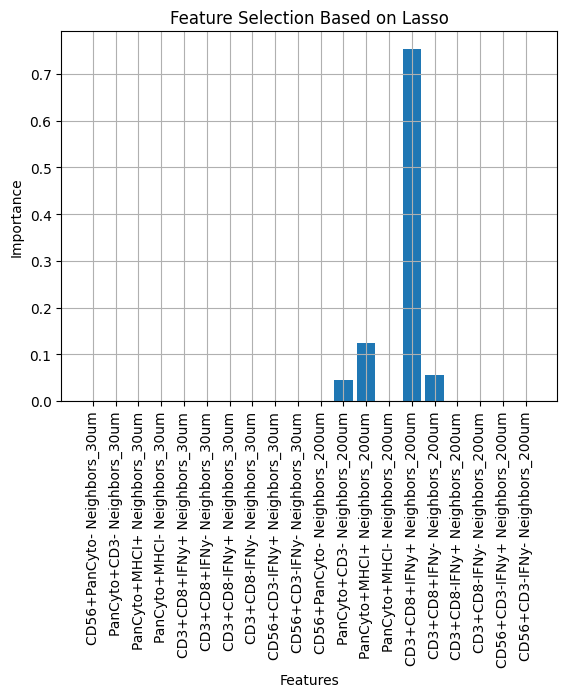

In [101]:
# plotting the Column Names and Importance of Columns. 
plt.bar(full_z_score_x.columns, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
#plt.ylim(0, 0.15)
plt.show()

In [103]:
lasso_selected_x

,PanCyto+CD3- Neighbors_200um,PanCyto+MHCI+ Neighbors_200um,CD3+CD8+IFNy+ Neighbors_200um,CD3+CD8+IFNy- Neighbors_200um
0,3.117785,0.068788,-0.377406,-0.228675
1,3.133064,0.086844,-0.394138,-0.233811
2,3.154372,0.150208,-0.391083,-0.201631
3,3.244003,0.745644,-0.464901,-0.027044
4,3.240957,0.704436,-0.453541,-0.067549
...,...,...,...,...
4060378,3.022316,-0.143426,-0.350789,-0.323141
4060379,2.995098,-0.202211,-0.354464,-0.325916
4060380,2.996633,-0.198972,-0.355737,-0.295443
4060381,2.995287,-0.201731,-0.355093,-0.296108


In [106]:
%%time 
# do you orthogoranlize all the permutations? -> yes



# Generate some example data
np.random.seed(42)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X = lasso_selected_x
opls = OPLS(2) # 1 components
Z = opls.fit_transform(X, y)
pls_model = PLSRegression(2)


pls_model.fit(Z, y)
#y_pred= pls.predict(X)
processed_y_pred = cross_val_predict(pls_model, Z, y, cv=5)

                           
processed_q_squared = r2_score(y, processed_y_pred) 
processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
processed_mse = mean_squared_error(y, processed_y_pred)
#processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
#processed_accuracy_rounded = round(processed_accuracy,2)

variance_in_x = np.var(pls_model.x_scores_, axis = 0) 
total_variance_in_x = np.var(Z, axis = 0)
# normalize variance by total variance:
#fractions_of_explained_variance = variance_in_x / total_variance_in_x

r2_X = opls.score(X)  # 7.8e-12 (most variance is removed)


# Number of permutations
num_permutations = 10

# List to store permutation accuracies
permuted_mse_list = []

# Permutation testing loop
for _ in range(num_permutations):
    # Randomly permute the labels
    permuted_labels = np.random.permutation(y)
    
    
#processed_y_pred = cross_val_predict(pls, Z, y, cv=1000)
#processed_q_squared = r2_score(y, processed_y_pred)  # 0.981
#processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
#processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
    opls = OPLS(2) # 1 components
    Z_i = opls.fit_transform(X, permuted_labels)

    #permuted_model.fit(X, permuted_labels)
    pls = PLSRegression(2)
    permuted_pred = cross_val_predict(pls, Z_i, permuted_labels, cv=5) # I should change this to something smaller, leave one out would literally take foever
    # Make predictions with the permuted model
    #permuted_predictions = permuted_model.predict(X)
    
    # Calculate accuracy and store in the list
    #permuted_pred = [round_to_sign(value) for value in permuted_pred]# Round each value in the list based on the specified rules

    permuted_mse = mean_squared_error(y, permuted_pred)
    #permuted_accuracy = accuracy_score(y, permuted_pred)
    permuted_mse_list.append(permuted_mse)

    


CPU times: user 1min 22s, sys: 1min 47s, total: 3min 10s
Wall time: 52.8 s


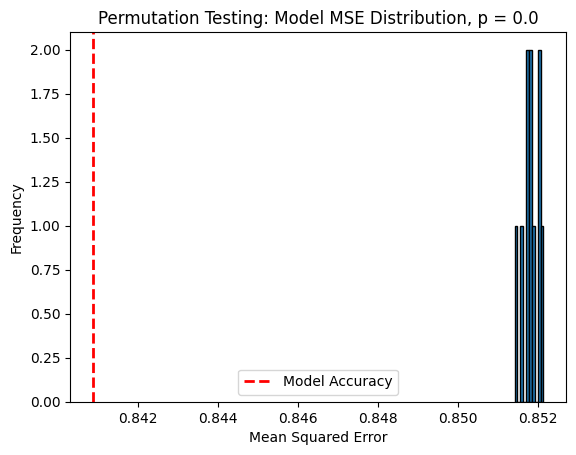

In [109]:
#permuted_accuracies = pd.Series(np.sort(permuted_accuracies), index = range(1000))
permuted_mse_list.sort()

result_count = count_values_greater_than(permuted_mse_list, processed_mse)
p = (10-result_count)/10
p_round = round(p,3)

# Plotting the histogram
#plt.hist(permuted_mse_list, bins=50, edgecolor='black')
plt.hist(permuted_mse_list, edgecolor='black')
plt.axvline(x=processed_mse, color='red', linestyle='dashed', linewidth=2, label='Model Accuracy')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title(f'Permutation Testing: Model MSE Distribution, p = {p}')
plt.legend()
plt.show()

In [110]:
#plt.figure(1)
#df = pd.DataFrame(np.column_stack([pls_model.x_scores_, opls.T_ortho_[:, 0]]),
#                  index=y.index, columns=['t', 't_ortho'])                
scores_df = pd.DataFrame(np.column_stack([pls_model.x_scores_]),
                  index=y.index, columns=['lv1', 'lv2'])       
scores_df['true label'] = y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


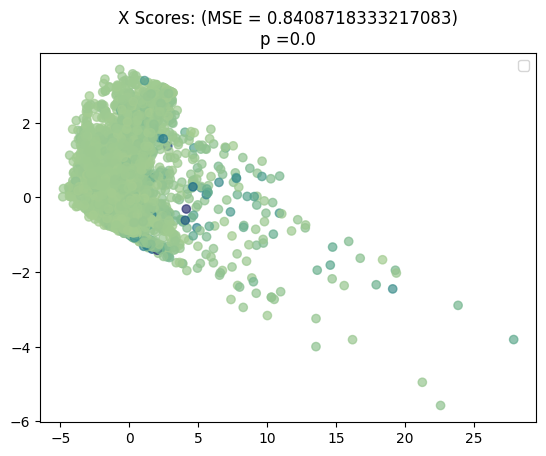

In [111]:
sampled_df = scores_df.sample(10000)

plt.scatter(sampled_df['lv1'], sampled_df['lv2'], c = sampled_df['true label'], cmap = 'crest', alpha = 0.7)
plt.title(f'X Scores: (MSE = {processed_mse})\np ={p_round}')
#plt.xlabel(f'PC1 X_var explained = {round(np.var(df.iloc[:,0])/sum(np.var(df.iloc[:,:], axis = None)), 3)}')
#plt.ylabel(f'PC2 X_var explained = {round(np.var(df.iloc[:,1])/sum(np.var(df.iloc[:,:], axis = None)), 3)}')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Loadings for oPLSDA model')

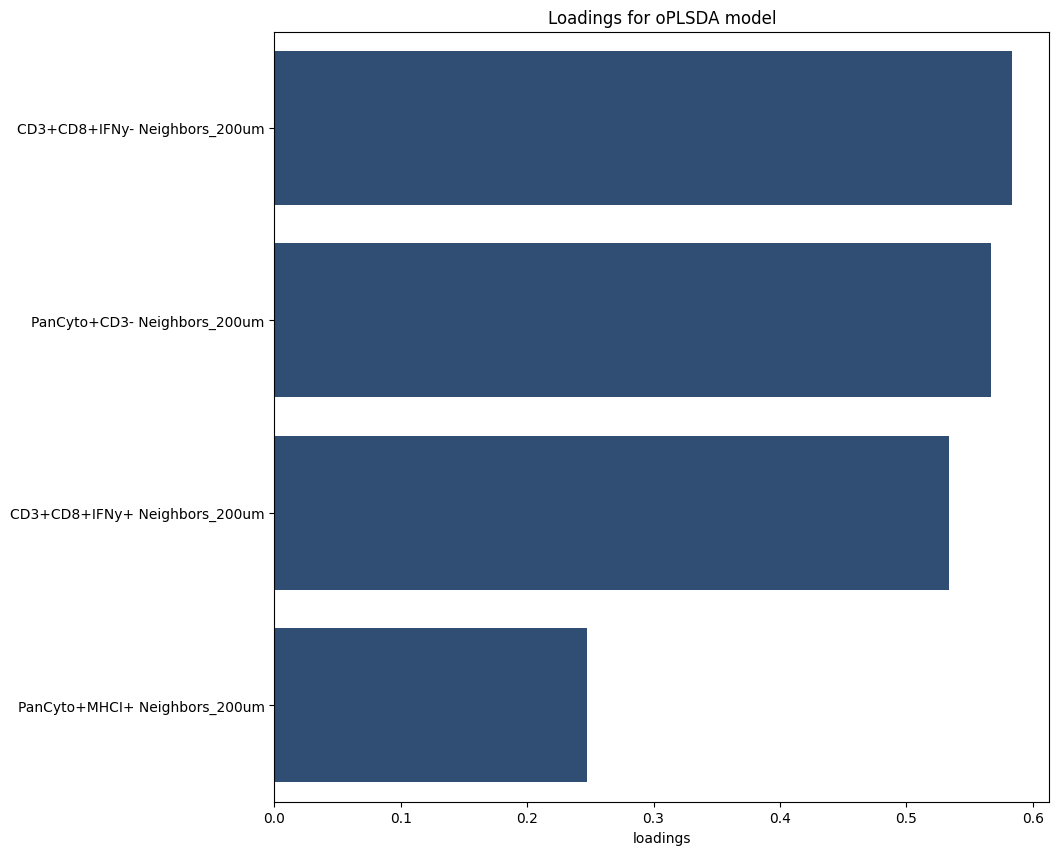

In [112]:
plt.figure(figsize=(10, 10)) 
x_loadings = pd.DataFrame(pls_model.x_loadings_[:,0].flatten(), index= X.columns, columns = ['loadings'])
x_loadings['color'] = np.where(x_loadings['loadings'] > 0, 'high', 'low')
colors = {'high': (0.14573579, 0.29354139, 0.49847009), 'low': (0.48942421, 0.72854938, 0.56751036)}

x_loadings['abs_val'] = abs(x_loadings['loadings'])
x_loadings = x_loadings.sort_values(by = 'abs_val', ascending=False)
sns.barplot(data = x_loadings, x=x_loadings['loadings'],y = x_loadings.index, hue = 'color', palette = colors)
plt.legend().set_visible(False)
plt.ylabel('')
plt.title('Loadings for oPLSDA model')

## now grid cv search with more alphas

In [15]:
df = pd.read_csv('/scratch/gh8sj/brown_nsclc/data/neighbor_data/iteration2/merged_neighbor_data.csv')
# parameters to be tested on GridSearchCV

In [154]:

neighbors =  ['PanCyto+MHCI+ Neighbors_30um', 'PanCyto+MHCI- Neighbors_30um', 
              'CD3+CD8+IFNy+ Neighbors_30um', 'CD3+CD8+IFNy- Neighbors_30um', 
              'CD3+CD8-IFNy+ Neighbors_30um', 'CD3+CD8-IFNy- Neighbors_30um', 
              'CD56+CD3-IFNy+ Neighbors_30um', 'CD56+CD3-IFNy- Neighbors_30um', 
              'PanCyto+MHCI+ Neighbors_200um', 'PanCyto+MHCI- Neighbors_200um', 
              'CD3+CD8+IFNy+ Neighbors_200um', 'CD3+CD8+IFNy- Neighbors_200um',
              'CD3+CD8-IFNy+ Neighbors_200um', 'CD3+CD8-IFNy- Neighbors_200um', 
              'CD56+CD3-IFNy+ Neighbors_200um', 'CD56+CD3-IFNy- Neighbors_200um']

X = df[neighbors]


# Number of Folds and adding the random state for replication
z_score_x = zscore(X.astype(float), axis = 1, ddof=1)
full_z_score_x.isna().sum()

CD56+PanCyto- Neighbors_30um      0
PanCyto+CD3- Neighbors_30um       0
PanCyto+MHCI+ Neighbors_30um      0
PanCyto+MHCI- Neighbors_30um      0
CD3+CD8+IFNy+ Neighbors_30um      0
CD3+CD8+IFNy- Neighbors_30um      0
CD3+CD8-IFNy+ Neighbors_30um      0
CD3+CD8-IFNy- Neighbors_30um      0
CD56+CD3-IFNy+ Neighbors_30um     0
CD56+CD3-IFNy- Neighbors_30um     0
CD56+PanCyto- Neighbors_200um     0
PanCyto+CD3- Neighbors_200um      0
PanCyto+MHCI+ Neighbors_200um     0
PanCyto+MHCI- Neighbors_200um     0
CD3+CD8+IFNy+ Neighbors_200um     0
CD3+CD8+IFNy- Neighbors_200um     0
CD3+CD8-IFNy+ Neighbors_200um     0
CD3+CD8-IFNy- Neighbors_200um     0
CD56+CD3-IFNy+ Neighbors_200um    0
CD56+CD3-IFNy- Neighbors_200um    0
dtype: int64

In [155]:

# drop rows with nas
full_z_score_x = z_score_x.loc[~z_score_x.isna().any(axis=1)]
full_df = df.loc[~z_score_x.isna().any(axis=1)]
y = full_df['IFNy (Opal 620) Cytoplasm Intensity']
y;

In [166]:
%%time 
#lasso1 = Lasso(alpha=1)

# Initializing the Model
#lasso_cv = LassoCV(cv = 10,alphas=[1E-4, 1E-3, 1E-2,1E-1,1], tol= 0.001)
lasso_cv = LassoCV(cv = 10,alphas=[1E-5,1E-4, 1E-3, 1E-2,1E-1,1], tol=1e-4)

# GridSearchCV with model, params and folds.
lasso_cv.fit(full_z_score_x,y)


/home/gh8sj/.conda/envs/spy_cell/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 602.5312296748161, tolerance: 340.97184793390926
  model = cd_fast.enet_coordinate_descent_gram(
/home/gh8sj/.conda/envs/spy_cell/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107042.67181979772, tolerance: 341.13088493013043
  model = cd_fast.enet_coordinate_descent_gram(
/home/gh8sj/.conda/envs/spy_cell/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6835.289392178878, tolerance: 340.42768548130005
  model = cd_fast.enet_coordinate_descent_gram(
/home/gh8sj/.conda/envs/spy_cell/

CPU times: user 7min 18s, sys: 43.5 s, total: 8min 2s
Wall time: 1min 32s


/home/gh8sj/.conda/envs/spy_cell/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.203e+05, tolerance: 3.447e+02
  model = cd_fast.enet_coordinate_descent(


LassoCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1], cv=10)

In [167]:

print("Optimal alpha:", lasso_cv.alpha_)

# Print the coefficients of the features
print("Coefficients:", lasso_cv.coef_)

# Predict on the test set
y_pred= lasso_cv.predict(full_z_score_x)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error on Test Set:", mse)

Optimal alpha: 1e-05
Coefficients: [ 0.81352098  0.45811902  0.80164184 -0.2520426  -4.68317374 -0.18885915
 -3.85049327  0.01311974  0.07680741  0.01852251  1.02320972  0.04739184
  5.5360611   0.01122399  0.41825303 -0.01173416]
Mean Squared Error on Test Set: 0.7321219922220432


In [168]:
lasso_feat = lasso_cv.coef_
selected_features = np.array(z_score_x.columns)[lasso_feat != 0]
lasso_selected_x = full_z_score_x.loc[:,full_z_score_x.columns.isin(selected_features)]

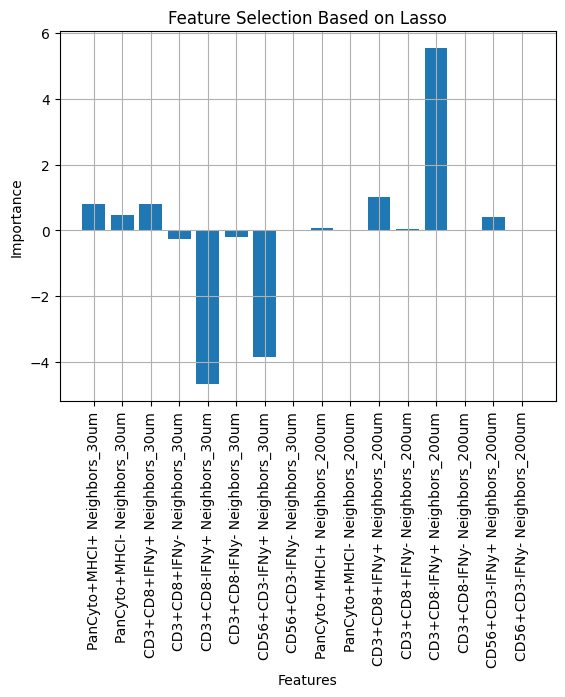

In [169]:
# plotting the Column Names and Importance of Columns. 
plt.bar(full_z_score_x.columns, lasso_feat)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
#plt.ylim(0, 0.15)
plt.show()

In [170]:
lasso_selected_x

,PanCyto+MHCI+ Neighbors_30um,PanCyto+MHCI- Neighbors_30um,CD3+CD8+IFNy+ Neighbors_30um,CD3+CD8+IFNy- Neighbors_30um,CD3+CD8-IFNy+ Neighbors_30um,CD3+CD8-IFNy- Neighbors_30um,CD56+CD3-IFNy+ Neighbors_30um,CD56+CD3-IFNy- Neighbors_30um,PanCyto+MHCI+ Neighbors_200um,PanCyto+MHCI- Neighbors_200um,CD3+CD8+IFNy+ Neighbors_200um,CD3+CD8+IFNy- Neighbors_200um,CD3+CD8-IFNy+ Neighbors_200um,CD3+CD8-IFNy- Neighbors_200um,CD56+CD3-IFNy+ Neighbors_200um,CD56+CD3-IFNy- Neighbors_200um
0,-0.331026,-0.281985,-0.331026,-0.331026,-0.331026,-0.331026,-0.331026,-0.331026,0.257464,3.690322,-0.331026,-0.134862,-0.331026,0.110342,-0.331026,-0.331026
1,-0.347498,-0.135015,-0.347498,-0.347498,-0.347498,-0.241256,-0.347498,-0.347498,0.289950,3.689672,-0.347498,-0.135015,-0.347498,0.006640,-0.347498,-0.347498
2,-0.314530,-0.278325,-0.350735,-0.314530,-0.350735,-0.350735,-0.350735,-0.350735,0.373363,3.668009,-0.350735,-0.097301,-0.350735,0.119929,-0.350735,-0.350735
3,-0.445969,-0.409931,-0.482007,-0.482007,-0.482007,-0.482007,-0.482007,-0.482007,1.211774,3.013668,-0.482007,0.130637,-0.482007,1.319888,-0.482007,-0.482007
4,-0.467321,-0.428779,-0.467321,-0.467321,-0.467321,-0.467321,-0.467321,-0.467321,1.151440,3.078536,-0.467321,0.072266,-0.467321,1.267066,-0.467321,-0.467321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060378,-0.274584,-0.195504,-0.283371,-0.274584,-0.283371,-0.283371,-0.283371,-0.283371,-0.019770,3.740939,-0.283371,-0.248224,-0.283371,-0.177931,-0.283371,-0.283371
4060379,-0.283021,-0.103325,-0.283021,-0.283021,-0.283021,-0.283021,-0.283021,-0.283021,-0.091345,3.742163,-0.283021,-0.247082,-0.283021,-0.187183,-0.283021,-0.283021
4060380,-0.290772,-0.199549,-0.290772,-0.290772,-0.290772,-0.290772,-0.290772,-0.290772,-0.093123,3.738223,-0.290772,-0.214753,-0.290772,-0.032308,-0.290772,-0.290772
4060381,-0.275037,-0.215570,-0.289904,-0.289904,-0.289904,-0.289904,-0.289904,-0.289904,-0.096635,3.739017,-0.289904,-0.215570,-0.289904,-0.037167,-0.289904,-0.289904


In [171]:
%%time 
# do you orthogoranlize all the permutations? -> yes



# Generate some example data
np.random.seed(42)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X = lasso_selected_x
opls = OPLS(2) # 1 components
Z = opls.fit_transform(X, y)
pls_model = PLSRegression(2)


pls_model.fit(Z, y)
#y_pred= pls.predict(X)
processed_y_pred = cross_val_predict(pls_model, Z, y, cv=5)

                           
processed_q_squared = r2_score(y, processed_y_pred) 
processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
processed_mse = mean_squared_error(y, processed_y_pred)
#processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
#processed_accuracy_rounded = round(processed_accuracy,2)

variance_in_x = np.var(pls_model.x_scores_, axis = 0) 
total_variance_in_x = np.var(Z, axis = 0)
# normalize variance by total variance:
#fractions_of_explained_variance = variance_in_x / total_variance_in_x

r2_X = opls.score(X)  # 7.8e-12 (most variance is removed)


# Number of permutations
num_permutations = 10

# List to store permutation accuracies
permuted_mse_list = []

# Permutation testing loop
for _ in range(num_permutations):
    # Randomly permute the labels
    permuted_labels = np.random.permutation(y)
    
    
#processed_y_pred = cross_val_predict(pls, Z, y, cv=1000)
#processed_q_squared = r2_score(y, processed_y_pred)  # 0.981
#processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
#processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
    opls = OPLS(2) # 1 components
    Z_i = opls.fit_transform(X, permuted_labels)

    #permuted_model.fit(X, permuted_labels)
    pls = PLSRegression(2)
    permuted_pred = cross_val_predict(pls, Z_i, permuted_labels, cv=5) # I should change this to something smaller, leave one out would literally take foever
    # Make predictions with the permuted model
    #permuted_predictions = permuted_model.predict(X)
    
    # Calculate accuracy and store in the list
    #permuted_pred = [round_to_sign(value) for value in permuted_pred]# Round each value in the list based on the specified rules

    permuted_mse = mean_squared_error(y, permuted_pred)
    #permuted_accuracy = accuracy_score(y, permuted_pred)
    permuted_mse_list.append(permuted_mse)

    


CPU times: user 3min 6s, sys: 3min 4s, total: 6min 11s
Wall time: 2min 14s


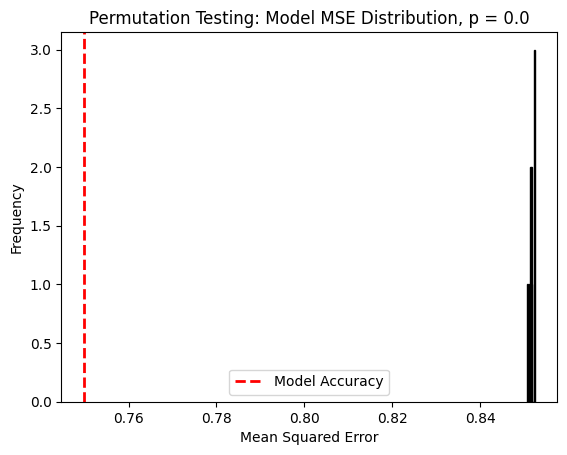

In [172]:
#permuted_accuracies = pd.Series(np.sort(permuted_accuracies), index = range(1000))
permuted_mse_list.sort()

result_count = count_values_greater_than(permuted_mse_list, processed_mse)
p = (10-result_count)/10
p_round = round(p,3)

# Plotting the histogram
#plt.hist(permuted_mse_list, bins=50, edgecolor='black')
plt.hist(permuted_mse_list, edgecolor='black')
plt.axvline(x=processed_mse, color='red', linestyle='dashed', linewidth=2, label='Model Accuracy')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title(f'Permutation Testing: Model MSE Distribution, p = {p}')
plt.legend()
plt.show()

In [173]:
#plt.figure(1)
#df = pd.DataFrame(np.column_stack([pls_model.x_scores_, opls.T_ortho_[:, 0]]),
#                  index=y.index, columns=['t', 't_ortho'])                
scores_df = pd.DataFrame(np.column_stack([pls_model.x_scores_]),
                  index=y.index, columns=['lv1', 'lv2'])       
scores_df['true label'] = y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


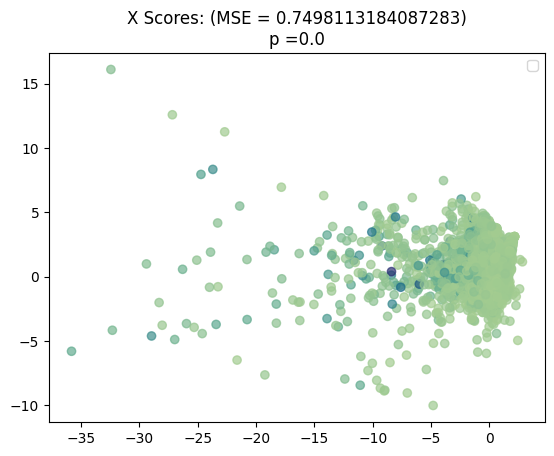

In [174]:
sampled_df = scores_df.sample(10000)

plt.scatter(sampled_df['lv1'], sampled_df['lv2'], c = sampled_df['true label'], cmap = 'crest', alpha = 0.7)
plt.title(f'X Scores: (MSE = {processed_mse})\np ={p_round}')
#plt.xlabel(f'PC1 X_var explained = {round(np.var(df.iloc[:,0])/sum(np.var(df.iloc[:,:], axis = None)), 3)}')
#plt.ylabel(f'PC2 X_var explained = {round(np.var(df.iloc[:,1])/sum(np.var(df.iloc[:,:], axis = None)), 3)}')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Loadings for oPLSDA model')

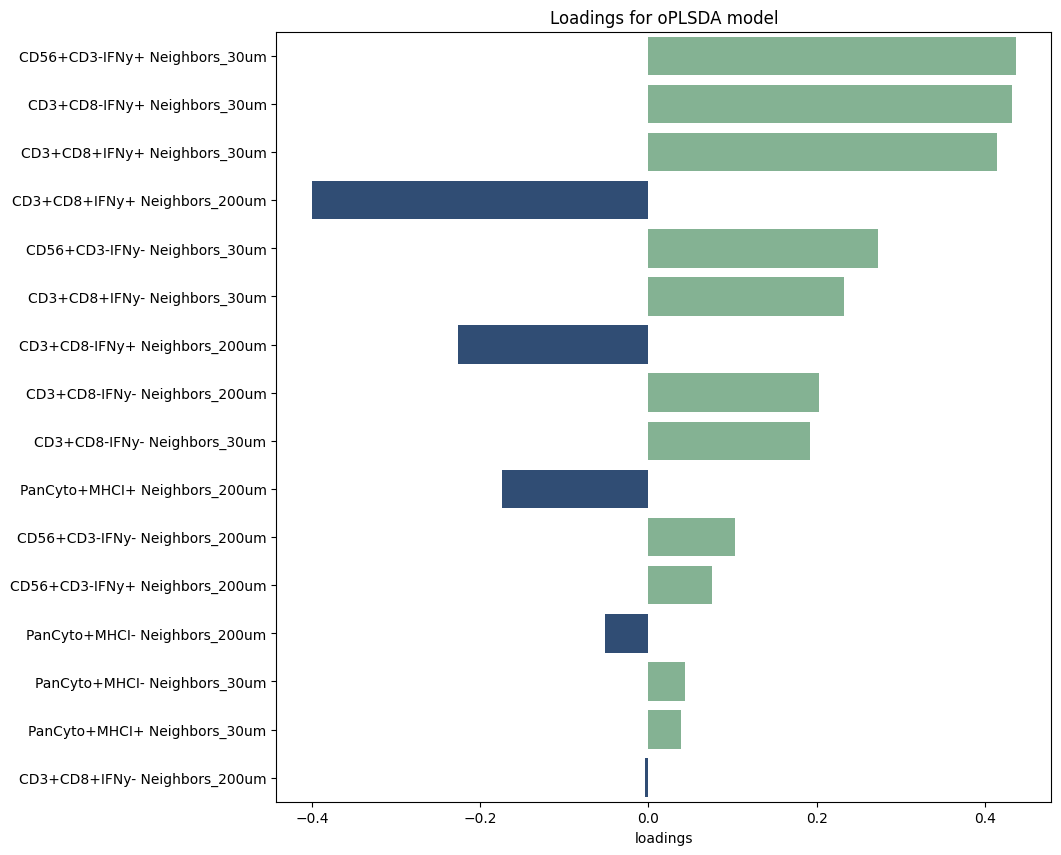

In [176]:
plt.figure(figsize=(10, 10)) 
x_loadings = pd.DataFrame(pls_model.x_loadings_[:,0].flatten(), index= X.columns, columns = ['loadings'])
x_loadings['color'] = np.where(x_loadings['loadings'] > 0, 'high', 'low')
colors = {'low': (0.14573579, 0.29354139, 0.49847009), 'high': (0.48942421, 0.72854938, 0.56751036)}

x_loadings['abs_val'] = abs(x_loadings['loadings'])
x_loadings = x_loadings.sort_values(by = 'abs_val', ascending=False)
sns.barplot(data = x_loadings, x=x_loadings['loadings'],y = x_loadings.index, hue = 'color', palette = colors)
plt.legend().set_visible(False)
plt.ylabel('')
plt.title('Loadings for oPLSDA model')

In [2]:
df = pd.read_csv('/scratch/gh8sj/brown_nsclc/data/neighbor_data/iteration2/merged_neighbor_data.csv')


In [3]:
df.columns

Index(['Unnamed: 0', 'Slide Index', 'ImageLocation', 'XMin', 'XMax', 'YMin',
       'YMax', 'MHCI', 'CD56', 'CD8', 'CD3', 'IFNy',
       'IFNy (Opal 620) Cytoplasm Intensity', 'PanCyto', 'ClassifierLabel',
       'ROI', 'PatientID', 'XCenter', 'YCenter', 'CellArea',
       'Cytoplasm Area (µm²)', 'Membrane Area (µm²)', 'Nucleus Area (µm²)',
       'Nucleus Perimeter (µm)', 'Nucleus Roundness', 'CD56+PanCyto-',
       'CD56+CD3-', 'PanCyto+CD3-', 'PanCyto+MHCI+', 'PanCyto+MHCI-',
       'PanCyto-CD56-', 'CD3+CD8-', 'CD3+CD8+', 'CD3+CD8+IFNy+',
       'CD3+CD8+IFNy-', 'CD3+CD8-IFNy+', 'CD3+CD8-IFNy-', 'CD56+CD3-IFNy+',
       'CD56+CD3-IFNy-', 'CD56+PanCyto- Neighbors_30um',
       'PanCyto+CD3- Neighbors_30um', 'PanCyto+MHCI+ Neighbors_30um',
       'PanCyto+MHCI- Neighbors_30um', 'CD3+CD8+IFNy+ Neighbors_30um',
       'CD3+CD8+IFNy- Neighbors_30um', 'CD3+CD8-IFNy+ Neighbors_30um',
       'CD3+CD8-IFNy- Neighbors_30um', 'CD56+CD3-IFNy+ Neighbors_30um',
       'CD56+CD3-IFNy- Neighbors_3

In [4]:
sns.scatterplot(data= df, x = 'CD56+PanCyto- Neighbors', y = 'IFNy (Opal 620) Cytoplasm Intensity', s = 1, alpha =0.5)

ValueError: Could not interpret value `CD56+PanCyto- Neighbors` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='CD3+CD8+IFNy+ Neighbors', ylabel='IFNy (Opal 620) Cytoplasm Intensity'>

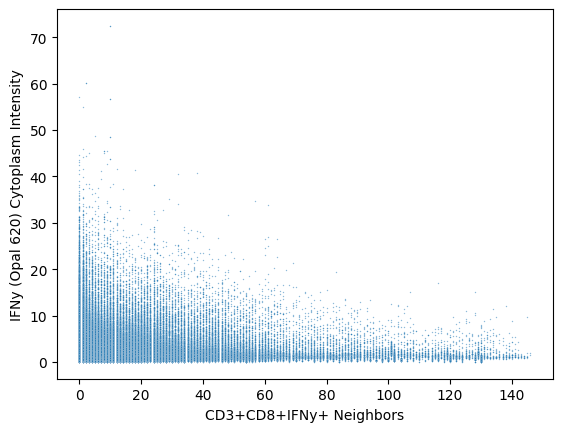

In [10]:
sns.scatterplot(data= df, x = 'CD3+CD8+IFNy+ Neighbors', y = 'IFNy (Opal 620) Cytoplasm Intensity', s = 1, alpha =0.5)

In [18]:
list(df.columns)

['Unnamed: 0',
 'Slide Index',
 'ImageLocation',
 'XMin',
 'XMax',
 'YMin',
 'YMax',
 'MHCI',
 'CD56',
 'CD8',
 'CD3',
 'IFNy',
 'IFNy (Opal 620) Cytoplasm Intensity',
 'PanCyto',
 'ClassifierLabel',
 'ROI',
 'PatientID',
 'XCenter',
 'YCenter',
 'CellArea',
 'Cytoplasm Area (µm²)',
 'Membrane Area (µm²)',
 'Nucleus Area (µm²)',
 'Nucleus Perimeter (µm)',
 'Nucleus Roundness',
 'CD56+PanCyto-',
 'CD56+CD3-',
 'PanCyto+CD3-',
 'PanCyto+MHCI+',
 'PanCyto+MHCI-',
 'PanCyto-CD56-',
 'CD3+CD8-',
 'CD3+CD8+',
 'CD3+CD8+IFNy+',
 'CD3+CD8+IFNy-',
 'CD3+CD8-IFNy+',
 'CD3+CD8-IFNy-',
 'CD56+CD3-IFNy+',
 'CD56+CD3-IFNy-',
 'CD56+PanCyto- Neighbors_30um',
 'PanCyto+CD3- Neighbors_30um',
 'PanCyto+MHCI+ Neighbors_30um',
 'PanCyto+MHCI- Neighbors_30um',
 'CD3+CD8+IFNy+ Neighbors_30um',
 'CD3+CD8+IFNy- Neighbors_30um',
 'CD3+CD8-IFNy+ Neighbors_30um',
 'CD3+CD8-IFNy- Neighbors_30um',
 'CD56+CD3-IFNy+ Neighbors_30um',
 'CD56+CD3-IFNy- Neighbors_30um',
 'CD56+PanCyto- Neighbors_200um',
 'PanCyto+CD3- N

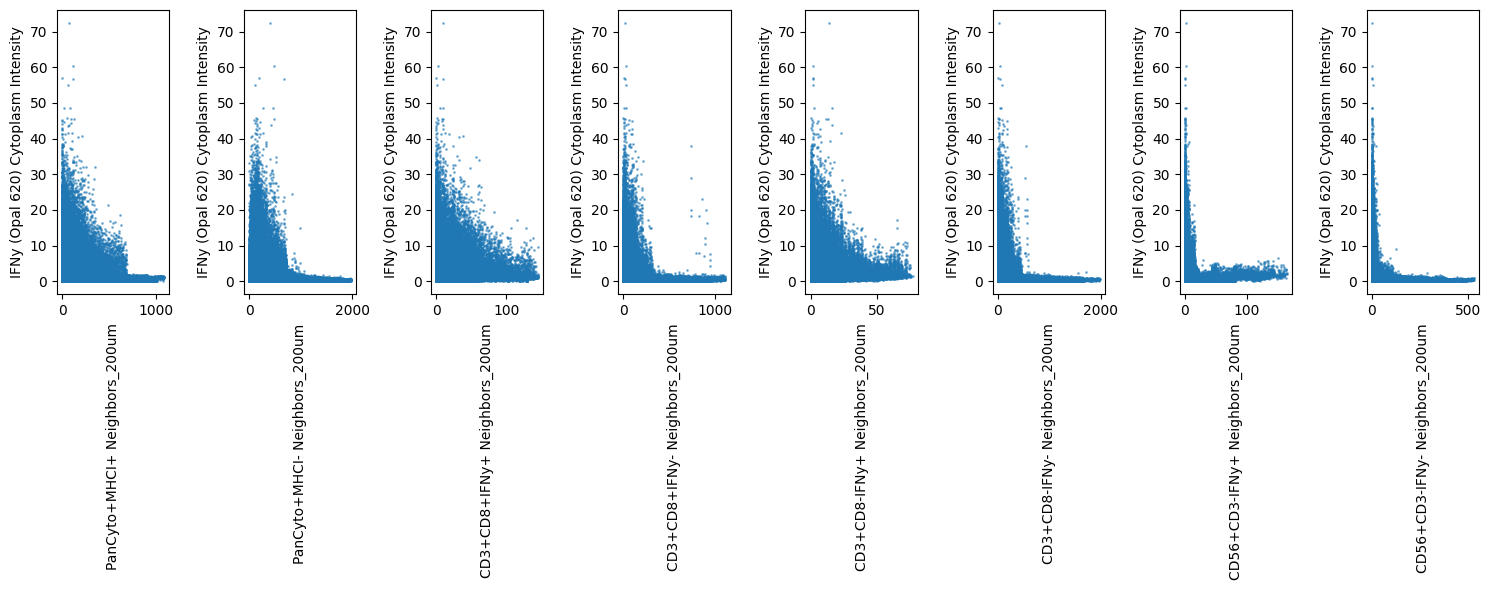

In [35]:
x_columns = [
 'PanCyto+MHCI+ Neighbors_200um',
 'PanCyto+MHCI- Neighbors_200um',
 'CD3+CD8+IFNy+ Neighbors_200um',
 'CD3+CD8+IFNy- Neighbors_200um',
 'CD3+CD8-IFNy+ Neighbors_200um',
 'CD3+CD8-IFNy- Neighbors_200um',
 'CD56+CD3-IFNy+ Neighbors_200um',
 'CD56+CD3-IFNy- Neighbors_200um']

y_column = 'IFNy (Opal 620) Cytoplasm Intensity'

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(x_columns), figsize=(15, 6))

# Iterate over x columns and create scatter plots
for i, x_column in enumerate(x_columns):
    axes[i].scatter(df[x_column], df[y_column], s = 1, alpha = 0.5)
    axes[i].set_xlabel(x_column, rotation=90)
    axes[i].set_ylabel(y_column)
    #axes[i].set_title(f'Scatter Plot: {x_column} vs {y_column}')
    #axes[i].tick_params(axis='x', rotation=45)  
    
plt.tight_layout()
plt.show()

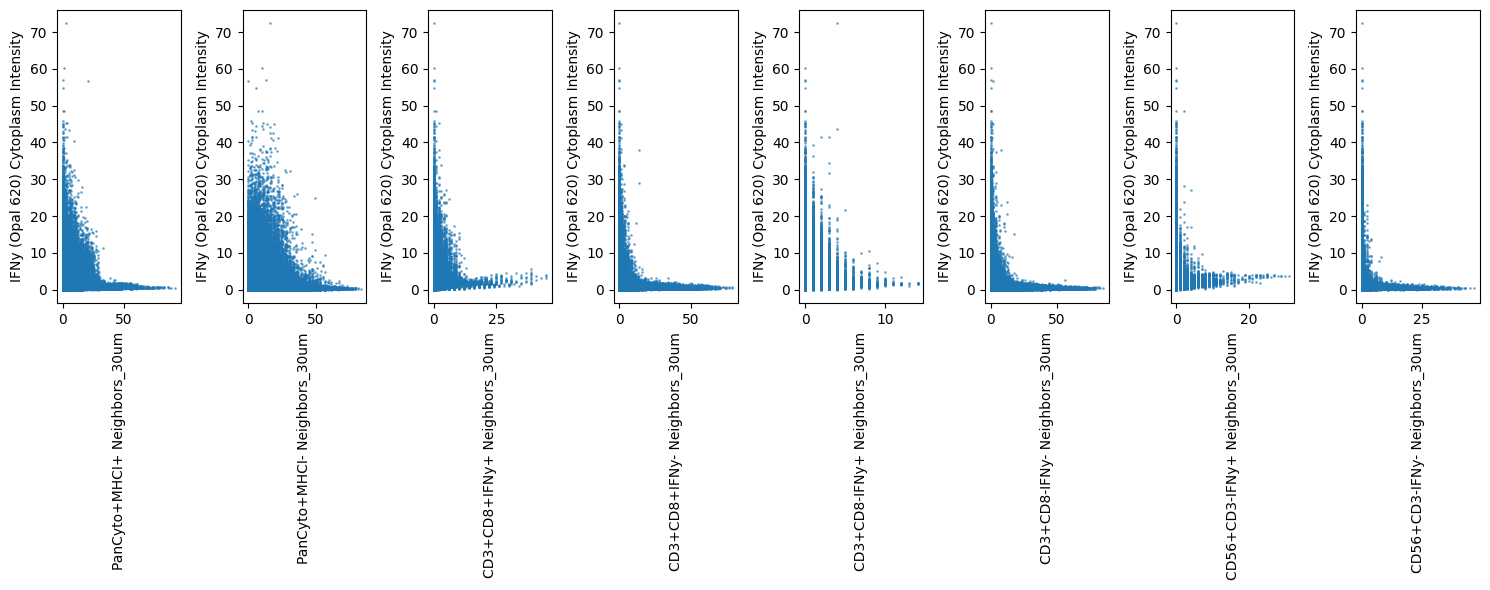

In [33]:
x_columns = ['PanCyto+MHCI+ Neighbors_30um',
 'PanCyto+MHCI- Neighbors_30um',
 'CD3+CD8+IFNy+ Neighbors_30um',
 'CD3+CD8+IFNy- Neighbors_30um',
 'CD3+CD8-IFNy+ Neighbors_30um',
 'CD3+CD8-IFNy- Neighbors_30um',
 'CD56+CD3-IFNy+ Neighbors_30um',
 'CD56+CD3-IFNy- Neighbors_30um']

y_column = 'IFNy (Opal 620) Cytoplasm Intensity'

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(x_columns), figsize=(15, 6))

# Iterate over x columns and create scatter plots
for i, x_column in enumerate(x_columns):
    axes[i].scatter(df[x_column], df[y_column], s = 1, alpha = 0.5)
    axes[i].set_xlabel(x_column, rotation=90)
    axes[i].set_ylabel(y_column)
    #axes[i].set_title(f'Scatter Plot: {x_column} vs {y_column}')
    #axes[i].tick_params(axis='x', rotation=45)  
    
plt.tight_layout()
plt.show()

In [14]:
# converting this to being more granular?
## neighbor by cell type?